In [13]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense, Input, Conv2D, Dense, Flatten, MaxPool2D, Dropout
from tensorflow.keras.models import Sequential 
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np

### Images Processing 

In [47]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape)
print(X_train[0])

n_classes = len(np.unique(y_train))

print(n_classes)

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   

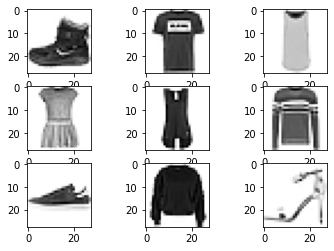

In [48]:
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i], cmap='Greys')

We need to reshape images so that they are flat and one-hot encode the labels. We're going to use min-max scaling since color channels have fixed possible values.

(array([25790964.,  1344502.,  1582733.,  1643562.,  1876736.,  2034790.,
         2606932.,  3303752.,  4306392.,  2549637.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

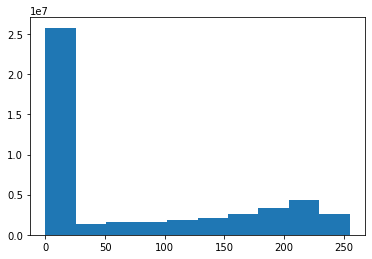

In [49]:
X_train_before = np.array(X_train)
plt.hist(X_train_before.flatten())

In [50]:
X_train = X_train.reshape(-1, 784).astype(float)
X_test = X_test.reshape(-1, 784).astype(float)

X_train /= 255
X_test /= 255 

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(X_train.shape)
print(y_train[:3])

(60000, 784)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


(array([25790964.,  1344502.,  1582733.,  1643562.,  1876736.,  2131629.,
         2510093.,  3303752.,  4306392.,  2549637.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

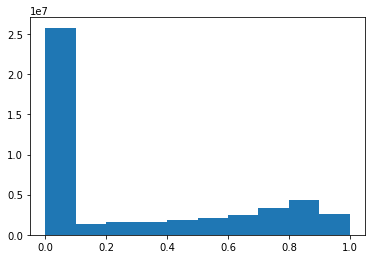

In [51]:
plt.hist(X_train.flatten())

(array([25790964.,  1344502.,  1582733.,  1643562.,  1876736.,  2034790.,
         2606932.,  3303752.,  4306392.,  2549637.]),
 array([-0.81025766, -0.52699099, -0.24372433,  0.03954234,  0.322809  ,
         0.60607566,  0.88934233,  1.17260899,  1.45587565,  1.73914232,
         2.02240898]),
 <BarContainer object of 10 artists>)

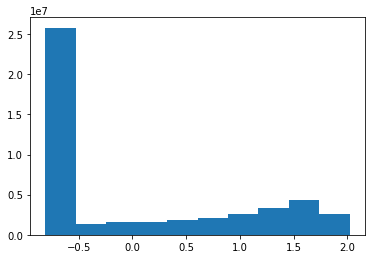

In [52]:
plt.hist((X_train_before.flatten() - np.mean(X_train_before.flatten())) / np.std(X_train_before.flatten()))

In [53]:
28 * 28

784

#### Build FCN

With Sequential constructor, we don't have to specify the input shape - however, no weights will be initialized. So it is better to include the input shape by adding 'Input' layer or by specifying the 'input_shape' argument.

In [54]:
fully_connected_model = Sequential()

# model.add(Input(shape=(784, )))
fully_connected_model.add(Dense(10, activation='relu', input_shape=(784, )))
fully_connected_model.add(Dense(10, activation='relu'))
fully_connected_model.add(Dense(10, activation='softmax'))

fully_connected_model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
print(X_train.shape)
print(y_train.shape)

(60000, 784)
(60000, 10)


In [56]:
epochs = 10

history = fully_connected_model.fit(X_train, y_train, 
          epochs=epochs, 
          batch_size=64,
          validation_split=.1)

Epoch 1/10
844/844 [==============================] - 3s 3ms/step - loss: 0.8518 - accuracy: 0.7004 - val_loss: 0.5569 - val_accuracy: 0.8052
Epoch 2/10
844/844 [==============================] - 2s 2ms/step - loss: 0.5212 - accuracy: 0.8175 - val_loss: 0.5139 - val_accuracy: 0.8193
Epoch 3/10
844/844 [==============================] - 2s 2ms/step - loss: 0.4845 - accuracy: 0.8315 - val_loss: 0.4916 - val_accuracy: 0.8272
Epoch 4/10
844/844 [==============================] - 2s 3ms/step - loss: 0.4619 - accuracy: 0.8392 - val_loss: 0.4643 - val_accuracy: 0.8358
Epoch 5/10
844/844 [==============================] - 2s 3ms/step - loss: 0.4447 - accuracy: 0.8463 - val_loss: 0.4631 - val_accuracy: 0.8392
Epoch 6/10
844/844 [==============================] - 2s 2ms/step - loss: 0.4337 - accuracy: 0.8502 - val_loss: 0.4501 - val_accuracy: 0.8418
Epoch 7/10
844/844 [==============================] - 2s 3ms/step - loss: 0.4232 - accuracy: 0.8528 - val_loss: 0.4551 - val_accuracy: 0.8392
Epoch 

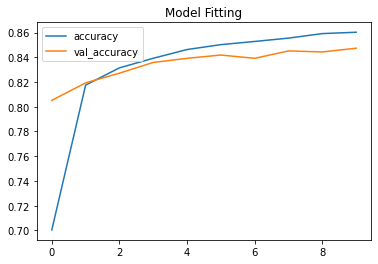

In [57]:
plt.plot(np.arange(epochs), history.history['accuracy'], linestyle='-', label='accuracy')
plt.plot(np.arange(epochs), history.history['val_accuracy'], label='val_accuracy')

plt.legend()
_ = plt.title("Model Fitting")

#### Convolutions

In [58]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [59]:
print(X_train.shape)

X_train = X_train.astype(float)
X_test = X_test.astype(float)

X_train /= 255
X_test /= 255 

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

(60000, 28, 28)


In [60]:
img_rows, img_cols = X_train[0].shape

single_cnn_model = Sequential()
single_cnn_model.add(Conv2D(10, kernel_size=3,
                             activation='relu', 
          input_shape=(img_rows, img_cols, 1)))

# Flatten layer is like a bridge between convolutions and dense layer
single_cnn_model.add(Flatten())
single_cnn_model.add(Dense(n_classes, activation='softmax'))

single_cnn_model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [61]:
epochs = 10

history = single_cnn_model.fit(X_train, y_train,
          batch_size=64,
          epochs=epochs, 
          validation_split=.2)

Epoch 1/10
750/750 [==============================] - 10s 13ms/step - loss: 0.5167 - accuracy: 0.8209 - val_loss: 0.4026 - val_accuracy: 0.8603
Epoch 2/10
750/750 [==============================] - 11s 15ms/step - loss: 0.3708 - accuracy: 0.8704 - val_loss: 0.3653 - val_accuracy: 0.8720
Epoch 3/10
750/750 [==============================] - 9s 12ms/step - loss: 0.3302 - accuracy: 0.8831 - val_loss: 0.3400 - val_accuracy: 0.8788
Epoch 4/10
750/750 [==============================] - 11s 14ms/step - loss: 0.3020 - accuracy: 0.8925 - val_loss: 0.3273 - val_accuracy: 0.8845
Epoch 5/10
750/750 [==============================] - 12s 15ms/step - loss: 0.2833 - accuracy: 0.8995 - val_loss: 0.3219 - val_accuracy: 0.8876
Epoch 6/10
750/750 [==============================] - 9s 13ms/step - loss: 0.2677 - accuracy: 0.9041 - val_loss: 0.3236 - val_accuracy: 0.8853
Epoch 7/10
750/750 [==============================] - 8s 11ms/step - loss: 0.2540 - accuracy: 0.9104 - val_loss: 0.3090 - val_accuracy: 0.

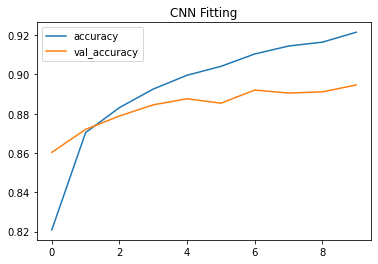

In [62]:
plt.plot(np.arange(epochs), history.history['accuracy'], linestyle='-', label='accuracy')
plt.plot(np.arange(epochs), history.history['val_accuracy'], label='val_accuracy')

plt.legend()
_ = plt.title("CNN Fitting")

In [63]:
single_cnn_model.evaluate(X_test, y_test, batch_size=64)

157/157 [==============================] - 1s 8ms/step - loss: 0.3207 - accuracy: 0.8871


[0.32066112756729126, 0.8870999813079834]

#### Improving Convolutions

Possible areas of change:

1. Padding : add extra zero border around the image
2. Stride : defines how big the step is  

The general formula for the output size is 

$$ O = \frac{I - K + 2 P}{S} + 1$$

where:
- O - output size
- I - input size
- K - kernel size
- P - size of zero padding
- S - size of stride 

for keras padding options, use 'valid' to allow shrinking the size and 'same' to get the same size as the input size

In [64]:
def model_for_different_params(strides, padding, dilation_rate):

    model = Sequential()
    model.add(Conv2D(10, kernel_size=3, activation='relu', 
            input_shape=(img_rows, img_cols, 1), 
            strides=strides,
            padding=padding, 
            dilation_rate=dilation_rate))

    # Flatten layer is like a bridge between convolutions and dense layer
    model.add(Flatten())
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(optimizer='adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
    
    return model 

In [65]:
def fit(model, epochs, batch_size=64):

    history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs, 
          validation_split=.2,
          verbose=False)
    
    return history.history['accuracy'], history.history['val_accuracy']

In [66]:
'''
params = [
    ('same', (1, 1), (1, 1)), ('same', (2, 2), (1, 1)), ('same', (1, 1), (2, 2)),
    ('valid', (1, 1), (1, 1)), ('valid', (2, 2), (1, 1))
]'''
params = []

figsize(10, 16)
i = 1
epochs=10
for (padding, strides, dilation_rate) in params:
    parametrized_model = model_for_different_params(strides, 
                                        padding, 
                                        dilation_rate)
    acc, val_acc = fit(parametrized_model, epochs)
    print(f"Model with padding={padding}, strides={strides} and dilation={dilation_rate}")
    plt.subplot(4, 2, i)
    i += 1
    plt.plot(np.arange(epochs), acc, label='accuracy')
    plt.plot(np.arange(epochs), val_acc, label='val_accuracy')

    plt.legend()
    

#### Build Deeper Models

The fundamental insight when it comes to processing image-like data is that pixels close to each other are more correlated than those far away. The special architecture defines kernels which are small arrays with learnable weights which represents a given pattern. The more deeper in the network, the more specific patterns are recognized. 

In [67]:
cnn_model = Sequential()

cnn_model.add(Conv2D(10, activation='relu', kernel_size=2, 
                 input_shape=(img_rows, img_cols, 1)))

cnn_model.add(Conv2D(10, activation='relu', kernel_size=2))

cnn_model.add(Flatten())
cnn_model.add(Dense(n_classes, activation='softmax'))

cnn_model.compile(optimizer='adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

epochs = 10

acc, val_acc = fit(cnn_model, 10)

We can see that the validation accuracy reaches some plateau and only the training accuracy increases. This is a form of overfitting.

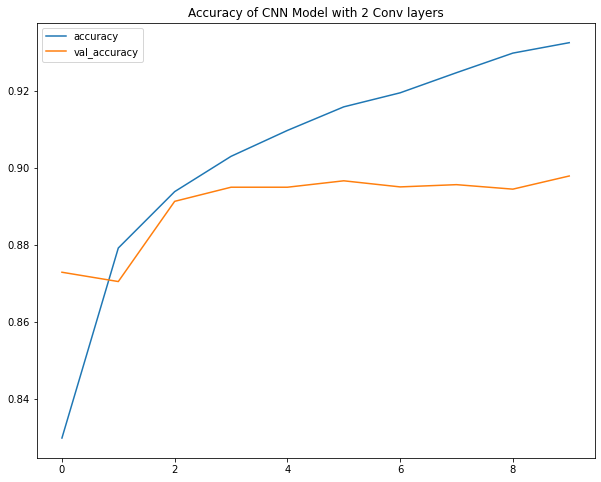

In [68]:
figsize(10, 8)

plt.plot(np.arange(epochs), acc, label='accuracy')
plt.plot(np.arange(epochs), val_acc, label='val_accuracy')

plt.title("Accuracy of CNN Model with 2 Conv layers")
_ = plt.legend()

CNN doesn't neccesairly shrink down the number of parameters in total, but we can observe that the convolutional part is very condensed - it learns general features in the early layers and then more complicated structures in the deeper layers. However classifying those features in the fully connected layer is exhaustive and requires many parameters. 

In [69]:
fully_connected_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                7850      
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [70]:
cnn_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 27, 27, 10)        50        
                                                                 
 conv2d_13 (Conv2D)          (None, 26, 26, 10)        410       
                                                                 
 flatten_7 (Flatten)         (None, 6760)              0         
                                                                 
 dense_13 (Dense)            (None, 10)                67610     
                                                                 
Total params: 68,070
Trainable params: 68,070
Non-trainable params: 0
_________________________________________________________________


#### Pooling
To decrease the number of parameters, we apply a pooling operation which summarizes a region of the image (usually 2 x 2) in a single value, shrinking each dimension by 2. This also prevents from overfitting since any minor change in pixel values would result in change to parameters (like rotation).

In [71]:
pooled_cnn_model = Sequential()

pooled_cnn_model.add(Conv2D(10, activation='relu', kernel_size=2, 
                 input_shape=(img_rows, img_cols, 1)))

pooled_cnn_model.add(MaxPool2D(2))

pooled_cnn_model.add(Conv2D(10, activation='relu', kernel_size=2))

pooled_cnn_model.add(MaxPool2D(2))
pooled_cnn_model.add(Flatten())
pooled_cnn_model.add(Dense(n_classes, activation='softmax'))

pooled_cnn_model.compile(optimizer='adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

epochs = 20

acc, val_acc = fit(pooled_cnn_model, 20)

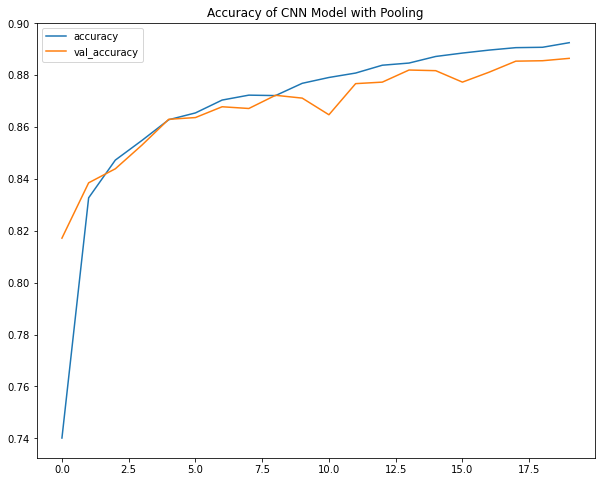

In [72]:
figsize(10, 8)

plt.plot(np.arange(epochs), acc, label='accuracy')
plt.plot(np.arange(epochs), val_acc, label='val_accuracy')

plt.title("Accuracy of CNN Model with Pooling")
plt.legend()

With pooling, the number of parameters has shrunk significantly

In [73]:
pooled_cnn_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 27, 27, 10)        50        
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 10)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 12, 12, 10)        410       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 6, 6, 10)         0         
 2D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 360)               0         
                                                                 
 dense_14 (Dense)            (None, 10)              

### Regularization

With unlimited computation, the best way to regularize a model is to take average over the predictions of all possible models (that is different parameter settings), weigthing them by posterior probabilities given the training data. 

#### Dropout

For neural nets this would be computationally expensive, and we may not have enough data to train them. One technique to prevent overfitting is Droupout. It corresponds to temporairly removing some units from the network with all it's outgoing and incoming connections with some probability p. 
During the test, we don't average over all possible models, but the output of each node is scaled by the probability of it's presence under the distribution used to drop units at training time. 

#### Batch normalization

Batch normalization - standardizing results of each layer.
"The disharmony of batch normalization and dropout" - do not use these two techniques at the same time.

In [74]:
dropout_cnn_model = Sequential()

dropout_cnn_model.add(Conv2D(10, activation='relu', kernel_size=2, 
                 input_shape=(img_rows, img_cols, 1)))

dropout_cnn_model.add(Dropout(0.2))

dropout_cnn_model.add(Conv2D(10, activation='relu', kernel_size=2))

dropout_cnn_model.add(MaxPool2D(2))
dropout_cnn_model.add(Flatten())
dropout_cnn_model.add(Dense(n_classes, activation='softmax'))

dropout_cnn_model.compile(optimizer='adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

epochs = 10

acc, val_acc = fit(dropout_cnn_model, epochs)

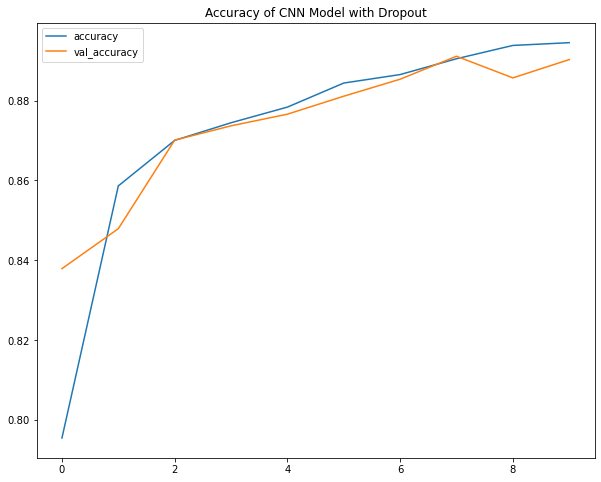

In [75]:
figsize(10, 8)

plt.plot(np.arange(epochs), acc, label='accuracy')
plt.plot(np.arange(epochs), val_acc, label='val_accuracy')

plt.title("Accuracy of CNN Model with Dropout")
plt.legend()

In [76]:
from keras.layers import BatchNormalization

batchnorm_cnn_model = Sequential()

batchnorm_cnn_model.add(Conv2D(10, activation='relu', kernel_size=2, 
                 input_shape=(img_rows, img_cols, 1)))

batchnorm_cnn_model.add(BatchNormalization())

batchnorm_cnn_model.add(Conv2D(10, activation='relu', kernel_size=2))

batchnorm_cnn_model.add(MaxPool2D(2))
batchnorm_cnn_model.add(Flatten())
batchnorm_cnn_model.add(Dense(n_classes, activation='softmax'))

batchnorm_cnn_model.compile(optimizer='adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

epochs = 10

acc, val_acc = fit(batchnorm_cnn_model, epochs)

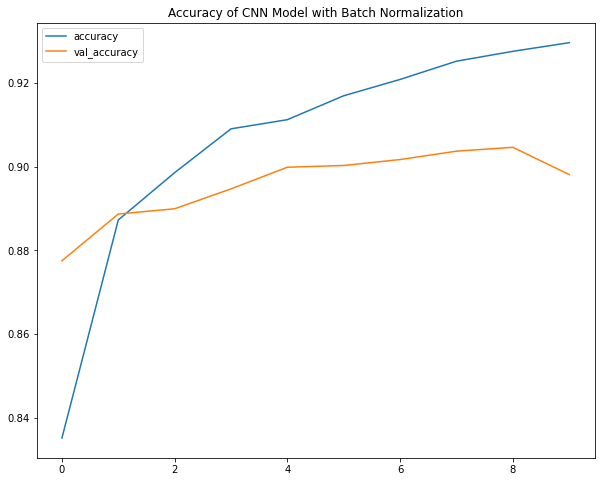

In [77]:
figsize(10, 8)

plt.plot(np.arange(epochs), acc, label='accuracy')
plt.plot(np.arange(epochs), val_acc, label='val_accuracy')

plt.title("Accuracy of CNN Model with Batch Normalization")
plt.legend()

In [78]:
batchnorm_cnn_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 27, 27, 10)        50        
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 10)       40        
 hNormalization)                                                 
                                                                 
 conv2d_19 (Conv2D)          (None, 26, 26, 10)        410       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 10)       0         
 2D)                                                             
                                                                 
 flatten_10 (Flatten)        (None, 1690)              0         
                                                                 
 dense_16 (Dense)            (None, 10)              

In [79]:
import cnn_utils

first_layer = cnn_model.layers[0]
weights = first_layer.get_weights()[0]
print(len(weights))
weights.shape

2


(2, 2, 1, 10)

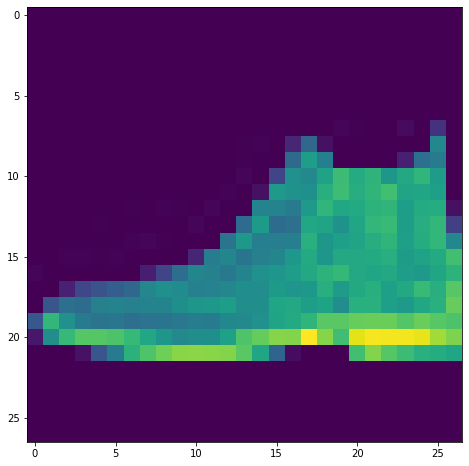

In [80]:
kernel1 = weights[:, :, 0, 0]

convoluted = cnn_utils.convolution(kernel1, X_test[0])

plt.imshow(convoluted)

In [1]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure


image = data.astronaut()

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

ModuleNotFoundError: No module named 'skimage'

In [14]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape)
print(X_train[0, 0, :])

n_classes = len(np.unique(y_train))

print(n_classes)
print(y_train[:5])

X_train = X_train.astype('float') / 255
X_test = X_test.astype('float') / 255

X_train = X_train[:, :, :, None]
X_test = X_test[:, :, :, None]

print(X_train.shape)

(60000, 28, 28)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
10
[9 0 0 3 0]
(60000, 28, 28, 1)


In [15]:
model = Sequential([
    Conv2D(filters=64, kernel_size=7, activation='relu', padding='same', 
           input_shape=[28, 28, 1]),
    MaxPool2D(2), 
    Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'), 
    Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    MaxPool2D(2), 
    Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'), 
    Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    MaxPool2D(2),
    Flatten(), 
    Dense(128, activation='relu'), 
    Dropout(0.5), 
    Dense(64, activation='relu'),
    Dropout(0.5), 
    Dense(10, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)         2

C:\Users\julia\AppData\Local\Temp\ipykernel_25776\3648495644.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(p, -np.log(1 - p), label='loss for $y_i=0$')
C:\Users\julia\AppData\Local\Temp\ipykernel_25776\3648495644.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(p, -np.log(p), label='loss for $y_i=1$')


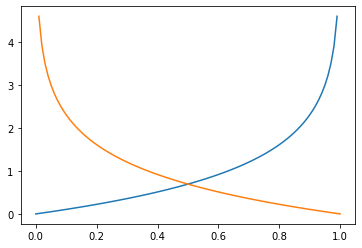

In [18]:
p = np.linspace(0, 1, 100)
plt.plot(p, -np.log(1 - p), label='loss for $y_i=0$')
plt.plot(p, -np.log(p), label='loss for $y_i=1$')